<a href="https://colab.research.google.com/github/Anu589/Bank-Marketing-Data/blob/main/Bank_Marketing_Data_manual_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Classifying the Bank Marketing Data Set Using Decision Tree and Naive Bayes Classifiers</b></h1>
<h6 align="center">The classification goal is to predict if the client will subscribe a term deposit.<h6 align="center">
<h3 align="center"><b>Name: Anushka Chakraborty</b></h2>
<h3 align="center"><b>Roll No: MDS202408</b></h2>


## 1. **Introduction**

This script implements machine learning models to predict the outcome of a bank marketing campaign. It applies Decision Tree (Gini and Entropy) and Naive Bayes classifiers to the dataset bank-additional-full.csv.

In [136]:
import sys
assert sys.version_info >= (3, 7)
from pathlib import Path
import time
import tracemalloc
from packaging import version

## 2. **Data Handling and Preprocessing**

- `pandas`: Data manipulation and analysis.
- `matplotlib.pyplot`: Visualization library.
- `seaborn`: Statistical data visualization built on `matplotlib`.
- `sklearn`: Machine learning library (version check enforced).

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [138]:
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

These settings ensure that all plots have a uniform and professional appearance.

Functions Used:
- `plt.rc('font', size=14)`: Sets the default font size.
- `plt.rc('axes', labelsize=14, titlesize=14)`: Adjusts axes labels and title sizes.
- `plt.rc('legend', fontsize=14)`: Configures legend font size.
- `plt.rc('xtick', labelsize=10)`: Sets x-axis tick label size.
- `plt.rc('ytick', labelsize=10)`: Sets y-axis tick label size.


In [139]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Function:
- `save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300)`:  
- Saves a Matplotlib figure with the given parameters.
  - `fig_id` (str): Filename for the saved figure.
  - `tight_layout` (bool): If `True`, applies `plt.tight_layout()` for better spacing.
  - `fig_extension` (str): File format (default: `"png"`).
  - `resolution` (int): DPI resolution for the saved figure (default: `300`).
  - Saves the figure in `IMAGES_PATH` using `plt.savefig()`.


In [140]:
IMAGES_PATH = Path() / "images bank" / "images bank"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
 path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
 if tight_layout:
  plt.tight_layout()
 plt.savefig(path, format=fig_extension, dpi=resolution)

## 3. **Data Loading and Initial Exploration**
- The dataset is loaded from a CSV file.



In [141]:
url = "/content/bank-additional-full.csv"

- The separator is ; (used in European CSV formats).

In [142]:
df = pd.read_csv(url, sep=";")

- Displays the first five rows of the dataset.

In [143]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

- Shows column names, data types, and missing values.

In [144]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Checking for unique values in object type columns

In [145]:
unique_values = df["housing"].unique()
print(unique_values)


['no' 'yes' 'unknown']


In [146]:
unique_values = df["loan"].unique()
print(unique_values)


['no' 'yes' 'unknown']


In [147]:
unique_values = df["job"].unique()
print(unique_values)


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [148]:
unique_values = df["marital"].unique()
print(unique_values)


['married' 'single' 'divorced' 'unknown']


In [149]:
unique_values = df["education"].unique()
print(unique_values)


['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [150]:
unique_values = df["default"].unique()
print(unique_values)

['no' 'unknown' 'yes']


In [151]:
unique_values = df["contact"].unique()
print(unique_values)

['telephone' 'cellular']


In [152]:
unique_values = df["month"].unique()
print(unique_values)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [153]:
unique_values = df["day_of_week"].unique()
print(unique_values)


['mon' 'tue' 'wed' 'thu' 'fri']


In [154]:
unique_values = df["poutcome"].unique()
print(unique_values)


['nonexistent' 'failure' 'success']


## 4. **Feature Scaling, Encoding and Scaling**

- Encode every object type columns into numerical values

In [155]:
# Job Encoding (3 categories)
def encode_job(job):
    if job in ["housemaid", "services", "admin.", "blue-collar", "technician", "management", "self-employed", "entrepreneur", "student"]:
        return "1"
    elif job in ["retired", "unemployed"]:
        return "0"
    else:
        return "-1"

df["job_encoded"] = df["job"].apply(encode_job)

# Marital Status Encoding (married = 1, others = 0)
df["marital_encoded"] = df["marital"].apply(lambda x: 1 if x == "married" else 0)

# Education Encoding (higher = 1, everything else = 0)
df["education_encoded"] = df["education"].apply(lambda x: 1 if x in ["university.degree", "professional.course"] else 0)

# Credit Default Encoding (yes = 1, no/unknown = 0)
df["default_encoded"] = df["default"].apply(lambda x: 1 if x == "yes" else 0)

# Contact Type Encoding (telephone = 1, cellular = 0)
df["contact_encoded"] = df["contact"].apply(lambda x: 1 if x != "telephone" else 0)

# Month Encoding (Convert to numeric)
month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}
df["month_encoded"] = df["month"].map(month_mapping)

# Day of the Week Encoding (Convert to numeric)
day_mapping = {
    "mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5, "sat": 6, "sun": 7
}
df["day_of_week_encoded"] = df["day_of_week"].map(day_mapping)

# Previous Campaign Outcome Encoding (success = 1, failure/nonexistent = 0)
df["poutcome_encoded"] = df["poutcome"].apply(lambda x: 1 if x == "success" else 0)

# Drop Original Categorical Columns
df = df.drop(columns=["job", "marital", "education", "default", "contact", "month", "day_of_week", "poutcome"])



In [156]:
# Encoding function for housing & loan
def encode_yn_unknown(value):
    if value == "yes":
        return 1
    elif value == "no":
        return 0
    else:
        return -1


In [157]:
# Apply encoding
df["housing_encoded"] = df["housing"].apply(encode_yn_unknown)
df["loan_encoded"] = df["loan"].apply(encode_yn_unknown)

# Drop original columns
df = df.drop(columns=["housing", "loan"])


- Shows column names, data types, and missing values after manual encoding.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   duration             41188 non-null  int64  
 2   campaign             41188 non-null  int64  
 3   pdays                41188 non-null  int64  
 4   previous             41188 non-null  int64  
 5   emp.var.rate         41188 non-null  float64
 6   cons.price.idx       41188 non-null  float64
 7   cons.conf.idx        41188 non-null  float64
 8   euribor3m            41188 non-null  float64
 9   nr.employed          41188 non-null  float64
 10  y                    41188 non-null  object 
 11  job_encoded          41188 non-null  object 
 12  marital_encoded      41188 non-null  int64  
 13  education_encoded    41188 non-null  int64  
 14  default_encoded      41188 non-null  int64  
 15  contact_encoded      41188 non-null 

In [159]:
X = df.drop(columns=['y'])  # Drops the target variable (y) from X.
y = df['y']  # Stores y separately.

In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   duration             41188 non-null  int64  
 2   campaign             41188 non-null  int64  
 3   pdays                41188 non-null  int64  
 4   previous             41188 non-null  int64  
 5   emp.var.rate         41188 non-null  float64
 6   cons.price.idx       41188 non-null  float64
 7   cons.conf.idx        41188 non-null  float64
 8   euribor3m            41188 non-null  float64
 9   nr.employed          41188 non-null  float64
 10  job_encoded          41188 non-null  object 
 11  marital_encoded      41188 non-null  int64  
 12  education_encoded    41188 non-null  int64  
 13  default_encoded      41188 non-null  int64  
 14  contact_encoded      41188 non-null  int64  
 15  month_encoded        41188 non-null 

- Encode yes/no target values into boolean values (1/0).

In [161]:
y_encoded = y.map({'yes': 1, 'no': 0})
y_encoded

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
# Compute correlation matrix
corr_matrix = X.corr()

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)


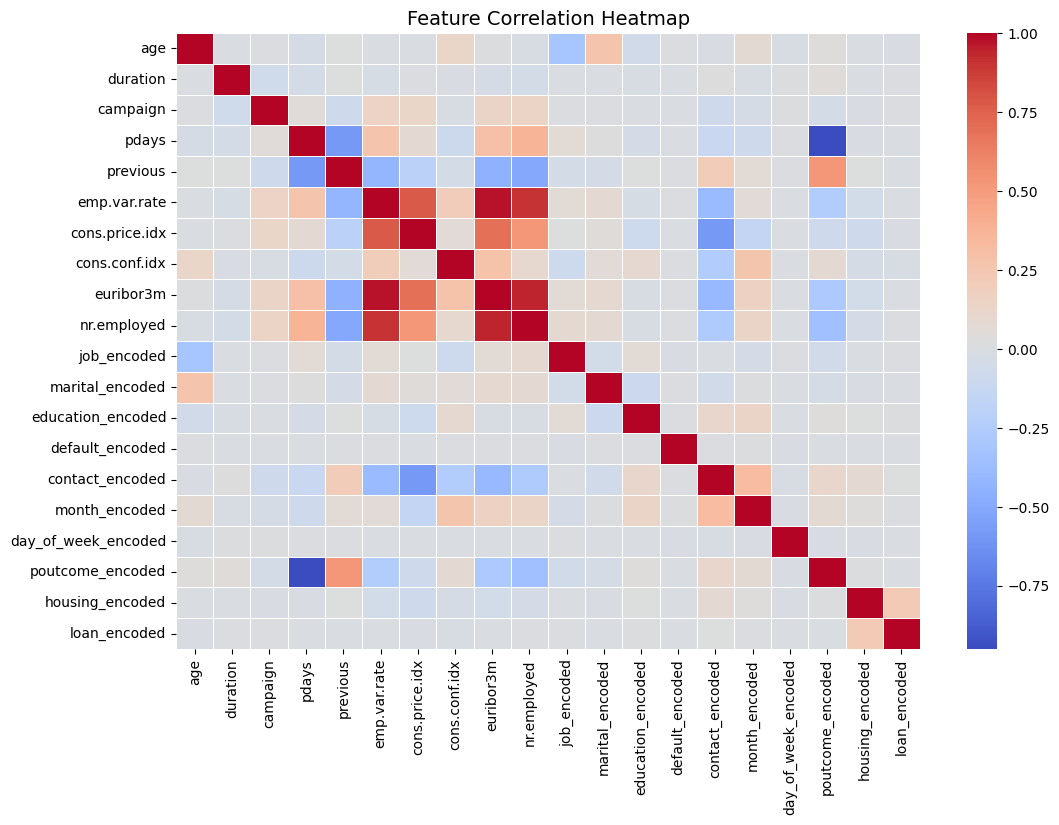

In [162]:
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

## 5. **Splitting Data into Training and Testing Sets**

- `train_test_split`: Splits data into training and testing sets.

In [163]:
from sklearn.model_selection import train_test_split

- Splits data into training (80%) and testing (20%) sets.

- random_state=42 ensures reproducibility.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## 6. **Decision Tree Model (Gini Criterion)**

#### - Import Packages

- `DecisionTreeClassifier`: Implements Decision Tree classification.

- `GridSearchCV`: Performs hyperparameter tuning.

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#### - Perform Hyperparameter Tuning using Grid Search and Cross Validation

- Performs hyperparameter tuning to find the optimal depth of the tree.
- max_depth controls how deep the decision tree can grow.
- range(1, 20) tests all values from 1 to 19 (i.e., 19 different depths).
- param_grid: Specifies that max_depth should be tuned between 1 and 19.
- scoring='accuracy': Evaluates models based on accuracy (higher is better).
- Uses cross-validation (cv=5).

In [166]:
param_grid = {'max_depth': range(1, 20)}
grid_search_gini = GridSearchCV(DecisionTreeClassifier(criterion="gini", random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_gini.fit(X_train, y_train)
best_max_depth_gini = grid_search_gini.best_params_['max_depth']
print(f"Optimal Max Depth for Decision Tree (Gini): {best_max_depth_gini}")

Optimal Max Depth for Decision Tree (Gini): 5


#### - Train the model

- Trains the Decision Tree classifier using the Gini index.

- Measures execution time and memory usage.

- `tracemalloc.get_traced_memory()`
  - This function returns a tuple:(current_memory, peak_memory)
    - current_memory → Memory currently allocated (in bytes).
    - peak_memory → Peak memory usage during execution (in bytes).

  we only need the current_memory and throw away the peak_memory

  - `tree_clf_gini` - to predict class labels for X_test and stores the results in y_pred_gini

In [167]:
time_start = time.time()
tracemalloc.start()
tree_clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth_gini, random_state=42)
tree_clf_gini.fit(X_train, y_train)
gini_memory, _ = tracemalloc.get_traced_memory()
gini_time = time.time() - time_start
tracemalloc.stop()

- `tree_clf_gini.predict(X_test)`:
  - Uses the trained Decision Tree (tree_clf_gini) to predict labels for the test data (X_test).
  - Returns an array of predicted values for each sample in X_test.


#### Predict

In [168]:
y_pred_gini = tree_clf_gini.predict(X_test)
y_pred_gini

array([0, 0, 0, ..., 0, 1, 0])

#### - Evaluate accuracy on test data.

In [169]:
dt_gini_accuracy = tree_clf_gini.score(X_test, y_test)
dt_gini_accuracy

0.9146637533381888

In [170]:
print(f"Decision Tree (Gini) Accuracy: {dt_gini_accuracy:.4f}")
print(f"Decision Tree (Gini) Time Taken: {gini_time:.4f} seconds")
print(f"Decision Tree (Gini) Memory Used: {gini_memory / 1e6:.2f} MB")


Decision Tree (Gini) Accuracy: 0.9147
Decision Tree (Gini) Time Taken: 0.2773 seconds
Decision Tree (Gini) Memory Used: 0.01 MB


#### - Visualize the Decision Tree

- `export_graphviz`, `graphviz.Source`: Visualizes decision trees.

In [171]:
from sklearn.tree import export_graphviz
from graphviz import Source

- `export_graphviz()` - Export Decision Tree
- `export_graphviz()` - Converts the Decision Tree into a .dot file (Graphviz format) for visualization.
- `out_file=str(IMAGES_PATH / "decision_tree.dot")` - Saves the tree structure as a .dot file.
- `feature_names=X_encoded.columns` - Labels the tree nodes with feature names.
- `rounded=True`  Makes the node edges rounded for better visualization.
- `filled=True` - Colors the nodes based on class distribution.

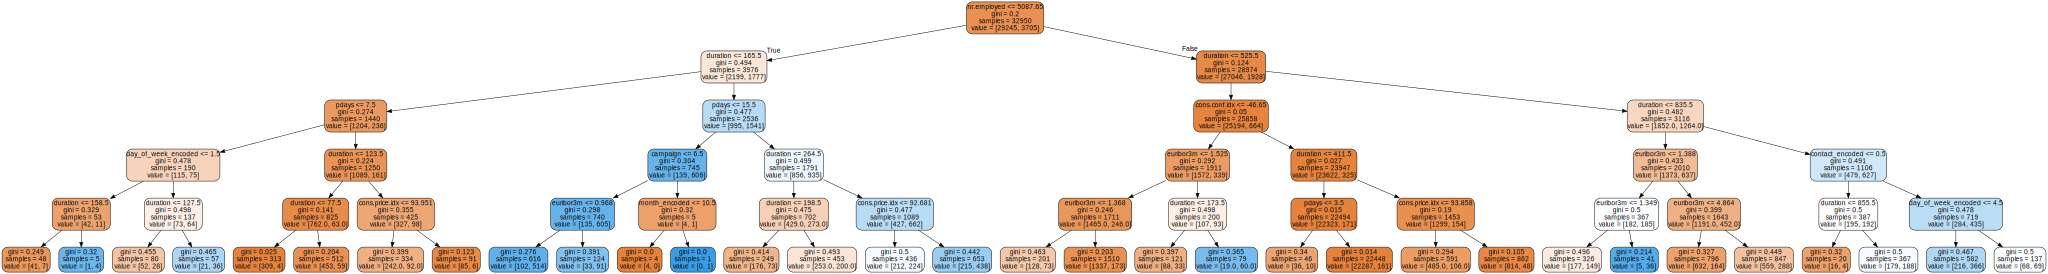

In [172]:
export_graphviz(
    tree_clf_gini,
    out_file=str(IMAGES_PATH / "decision_tree.dot"),
    feature_names=X.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "decision_tree.dot")

## 7. **Decision Tree Model (Entropy Criterion)**

#### -Train the model

- Trains Decision Tree using entropy (Shanon).

- Measures execution time and memory usage.

In [173]:
param_grid = {'max_depth': range(1, 20)}
grid_search_entropy = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_entropy.fit(X_train, y_train)
best_max_depth_entropy = grid_search_entropy.best_params_['max_depth']
print(f"Optimal Max Depth for Decision Tree (entropy): {best_max_depth_entropy}")

Optimal Max Depth for Decision Tree (entropy): 7


In [174]:
time_start = time.time()
tracemalloc.start()
tree_clf_entropy = DecisionTreeClassifier(criterion="entropy",  max_depth=best_max_depth_entropy, random_state=42)
tree_clf_entropy.fit(X_train, y_train)
entropy_memory, _ = tracemalloc.get_traced_memory()
entropy_time = time.time() - time_start
tracemalloc.stop()

#### -Predict

In [175]:
y_pred_entropy = tree_clf_entropy.predict(X_test)
y_pred_entropy

array([0, 0, 0, ..., 0, 1, 0])

#### - Evaluate Accuracy on Test Dataset

In [176]:
dt_entropy_accuracy = tree_clf_entropy.score(X_test, y_test)

In [177]:
print(f"Decision Tree (Entropy) Accuracy: {dt_entropy_accuracy:.4f}")
print(f"Decision Tree (Entropy) Time Taken: {entropy_time:.4f} seconds")
print(f"Decision Tree (Entropy) Memory Used: {entropy_memory / 1e6:.2f} MB")

Decision Tree (Entropy) Accuracy: 0.9099
Decision Tree (Entropy) Time Taken: 0.3019 seconds
Decision Tree (Entropy) Memory Used: 0.01 MB


#### - Visualize the Decision Tree

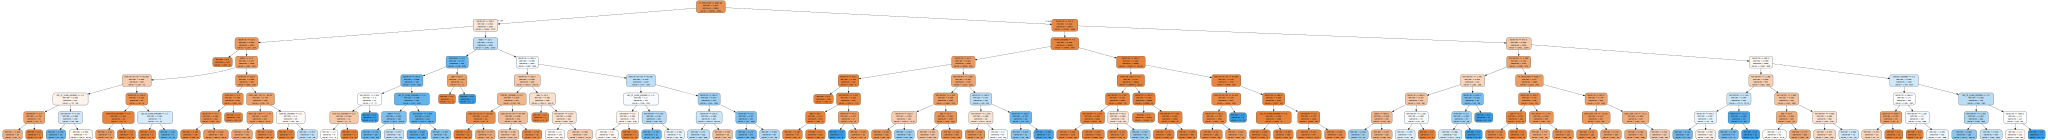

In [178]:
export_graphviz(
    tree_clf_entropy,
    out_file=str(IMAGES_PATH / "decision_tree_entropy.dot"),
    feature_names=X.columns,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "decision_tree_entropy.dot")


## 8. **Naive Bayes Classifier**

#### -Import Packages

- `GaussianNB`: Implements Naive Bayes classification.

In [179]:
from sklearn.naive_bayes import GaussianNB

#### - Train the model

- Trains a Gaussian Naive Bayes classifier.

- Measures execution time and memory usage.

In [180]:
time_start = time.time()
tracemalloc.start()
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_memory, _ = tracemalloc.get_traced_memory()
nb_time = time.time() - time_start
tracemalloc.stop()

In [181]:
nb_classifier

GaussianNB()

#### -Predict

- `nb_classifier.predict(X_test)`
  - Uses the trained Naïve Bayes classifier (nb_classifier) to predict class labels for X_test.
  - Returns an array of predicted class values (0 or 1 for binary classification).

In [182]:
y_pred_nb = nb_classifier.predict(X_test)

#### -Evaluate Accuracy on the Test Dataset

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)

In [185]:
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes Time Taken: {nb_time:.4f} seconds")
print(f"Naive Bayes Memory Used: {nb_memory / 1e6:.2f} MB")

Naive Bayes Accuracy: 0.8798
Naive Bayes Time Taken: 0.2581 seconds
Naive Bayes Memory Used: 0.01 MB


## 9.  **Comparision of Decision trees using Ginni Index, Entropy and Naive Baye's Classifier**

### 9.1 Confusion Matrix

- `classification_report`, `confusion_matrix`: Evaluates model performance.

In [186]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

#### Confusion Matrix for Ginni's Coefficient

In [187]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



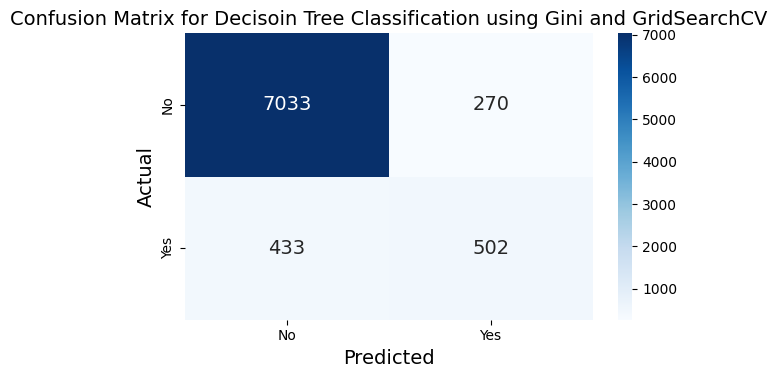

In [188]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decisoin Tree Classification using Gini and GridSearchCV")
save_fig("confusion_matrix")
plt.show()

#### Confusion Matrix for Entropy

In [189]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.63      0.51      0.56       935

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



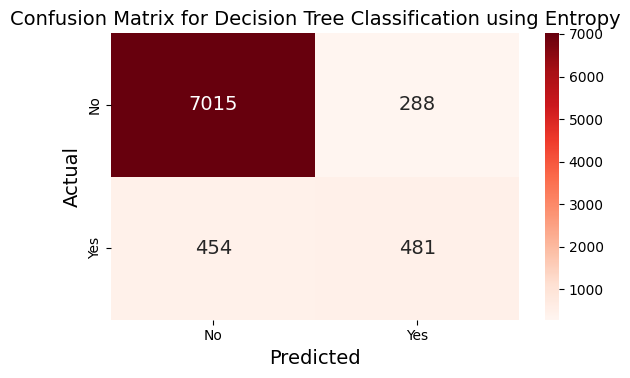

In [190]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Classification using Entropy")
save_fig("confusion_matrix")
plt.show()

#### Confusion Matrix for Naive Bayes Classifier

In [191]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7303
           1       0.47      0.55      0.51       935

    accuracy                           0.88      8238
   macro avg       0.71      0.74      0.72      8238
weighted avg       0.89      0.88      0.88      8238



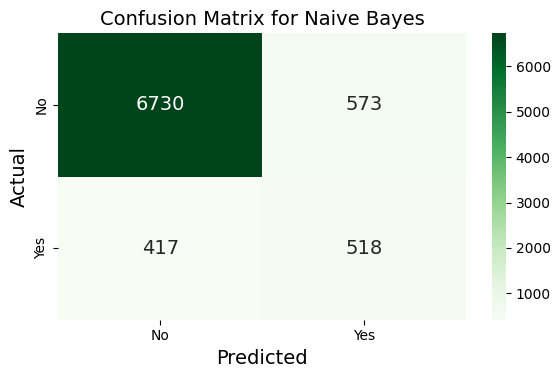

In [192]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naive Bayes")
save_fig("confusion_matrix")
plt.show()

### 9.2 Compare model accuracies and performance

In [193]:
print("\nModel Comparison:")
print(f"Decision Tree (Gini) Accuracy: {dt_gini_accuracy:.4f}, Time: {gini_time:.4f}s, Memory: {gini_memory / 1e6:.2f}MB")
print(f"Decision Tree (Entropy) Accuracy: {dt_entropy_accuracy:.4f}, Time: {entropy_time:.4f}s, Memory: {entropy_memory / 1e6:.2f}MB")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}, Time: {nb_time:.4f}s, Memory: {nb_memory / 1e6:.2f}MB")


Model Comparison:
Decision Tree (Gini) Accuracy: 0.9147, Time: 0.2773s, Memory: 0.01MB
Decision Tree (Entropy) Accuracy: 0.9099, Time: 0.3019s, Memory: 0.01MB
Naive Bayes Accuracy: 0.8798, Time: 0.2581s, Memory: 0.01MB


### 9.3 Probabilities for ROC and Precision-Recall curves

In [194]:
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
y_prob_gini = tree_clf_gini.predict_proba(X_test)[:, 1]
y_prob_entropy = tree_clf_entropy.predict_proba(X_test)[:, 1]

### 9.4 ROC Curve

- `roc_curve`: Generates performance evaluation curves.

In [195]:
from sklearn.metrics import roc_curve

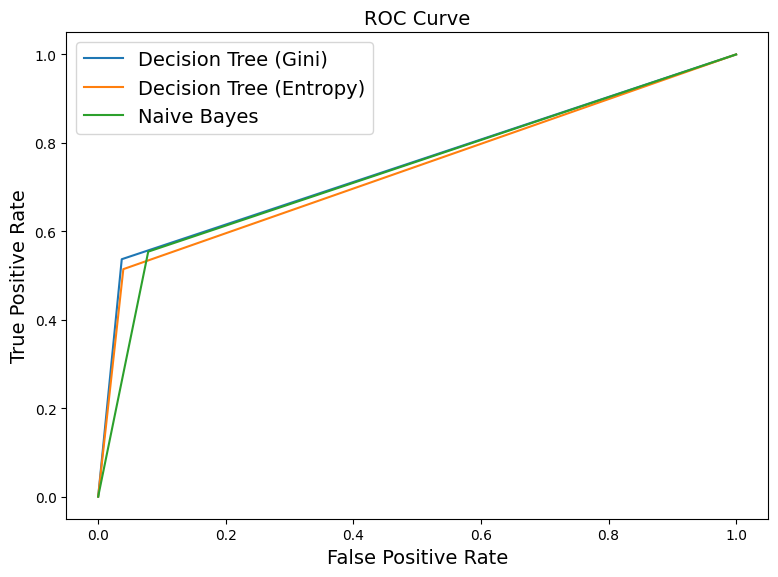

In [196]:
plt.figure(figsize=(8,6))
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
plt.plot(fpr_gini, tpr_gini, label="Decision Tree (Gini)")
plt.plot(fpr_entropy, tpr_entropy, label="Decision Tree (Entropy)")
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
save_fig("roc_curve")
plt.show()

- Better Performance : Closer to the top-left corner; steep initial rise indicates strong early classification.
- Naïve Bayes shows a sharp initial rise, suggesting aggressive positive classification but potential false positives.
- Decision Trees: Gini outperforms Entropy, especially at lower FPR values, while Entropy rises more gradually.

### 9.5 Precision-Recall Curve

- `precision_recall_curve`: Generates performance evaluation curves.

In [197]:
from sklearn.metrics import precision_recall_curve

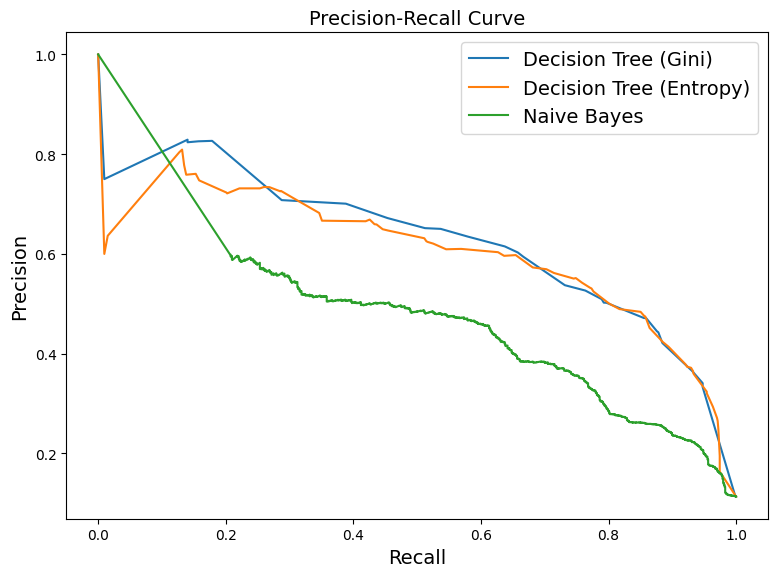

In [198]:
plt.figure(figsize=(8,6))
prec_gini, recall_gini, _ = precision_recall_curve(y_test, y_prob_gini)
prec_entropy, recall_entropy, _ = precision_recall_curve(y_test, y_prob_entropy)
prec_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
plt.plot(recall_gini, prec_gini, label="Decision Tree (Gini)")
plt.plot(recall_entropy, prec_entropy, label="Decision Tree (Entropy)")
plt.plot(recall_nb, prec_nb, label="Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
save_fig("precision_recall_curve")
plt.show()

### **Interpretation of the Precision-Recall Curve**  

- **Decision Tree (Gini)** (Blue Line) – Performs consistently well across recall values, maintaining higher precision than the entropy-based tree, especially at moderate recall levels.  

- **Decision Tree (Entropy)** (Orange Line) – Similar to the Gini-based tree but slightly lower precision at various points, indicating it may be more prone to misclassifications.  

- **Naive Bayes** (Green Line) – Has the **steepest drop** in precision as recall increases, showing that it struggles to maintain precision, especially at higher recall values.

## 10. **Conclusion**

In this analysis, we compared Decision Tree (Gini), Decision Tree (Entropy), and Naive Bayes classifiers on a bank marketing dataset. The key observations are:

- Decision Tree (Gini) achieved the highest accuracy, making it the best-performing model. However, its performance may be influenced by hyperparameter tuning, which could lead to overfitting.
- Decision Tree (Entropy) performed slightly worse than Gini but demonstrated more stable precision across different recall values.
- Naive Bayes was the fastest but had the lowest accuracy. This is likely due to its assumption of feature independence, which does not hold for this dataset.

**Key Takeaways**
- For highest accuracy: Decision Tree (Gini) is the best choice.
- For a balance of interpretability and precision: Decision Tree (Entropy) is more stable.
- For efficiency and speed: Naïve Bayes is a good alternative but sacrifices accuracy.

Confusion matrices showed that Decision Trees were better at correctly classifying both positive and negative cases. Ultimately, the choice of model depends on the trade-off between accuracy, interpretability, and computational efficiency based on real-world application needs.